## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [2]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [3]:
# წავიკითხოთ მონაცემები და დავბეჭდოთ პირველი 5 სტრიქონი
df = pd.read_csv('LoanStatus.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y


In [4]:
#სტატისტიკური მონაცემების შედარება შემოსავლისა და სესხის მიხედვით. შედეგად მივიღეთ გვერდიგვერ მყოფი მომხამრებლის შემოსავლისა 
#და სესხის მიხედვით სადაც ვხედავთ რომ საშუალო შემოსავლისა მეტია ვიდზრე სესხისა, რაც გვაძლევს საბაბს ვივარაუდოთ რომ ბევრ მომხამრებელს არ აქვს სესხი
Income = df['ApplicantIncome'].dropna().agg(['mean', 'median', 'std'])
Loan = df['LoanAmount'].dropna().agg(['mean', 'median', 'std'])

df_stats = pd.DataFrame({
    'ApplicantIncome': Income,
    'LoanAmount': Loan
})

df_stats

,ApplicantIncome,LoanAmount
mean,5403.459283,146.412162
median,3812.500000,128.000000
std,6109.041673,85.587325


In [17]:
# დავითვალოთ ცარიელი მნიშვნელობები
missing_values = df.isna().sum()
missing_values

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [25]:
#გამოვთვალოთ ალბათობა სესხის აღებისა ნებისმიერ შემთხვევაში
loan_prb = df['Loan_Status'].value_counts(normalize=True)
loan_prb

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

In [26]:
#გავფილტროთ კარგი საკრედიტო ისტორიის მქონე ადამიანები
credit_history = df[df['Credit_History'] == 1.0]

#გამოვთვალოთ ალბათობა სესხის აღებისა კარგი საკრედიტო ისტორიის პირობებში
goodstatus_loan = credit_history['Loan_Status'].value_counts(normalize=True)
goodstatus_loan

Loan_Status
Y    0.795789
N    0.204211
Name: proportion, dtype: float64

#ყველა მომხმარებლის გათვალისწინებით იმის ალბათობა რომ სესხი გაიცემა ადამიანზე არის 68 %, ხოლო კარგი საკრედიტო ისტორიის პირობებში იგი იმატებს და ამჯერად გაცემის ალბათობა 79% ია

## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

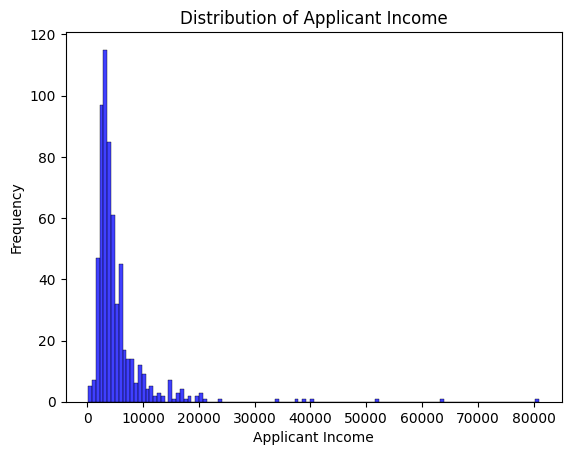

In [6]:
# შევქმნათ ჰისტოგრამა მომხამრებლის შემოსავლის და სიხშირის მიხედვით
sns.histplot(df['ApplicantIncome'], color='blue')
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()


მოცემული გვაქვს განაწილება მომხამრებლის შემოსავლის მიხედვით, სადაც შევხედავთ რომ ძირითადი ნაწილი თავმოყრილია 0-10000 შუალედში, ასევე წარმოდგენილი გვაქვს გარე შრეებზე მყოფი მონაცემებიც

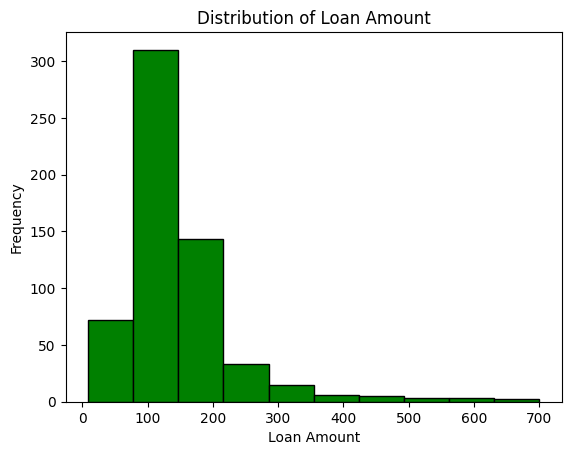

In [7]:
# შევქმნათ ჰისტოგრამა მომხამრებლის სესხის და სიხშირის მიხედვით ბლოკების გამყენებით
plt.hist(df['LoanAmount'].dropna(), bins=10, color='green', edgecolor='black')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


მოცემული გვაქვს განაწილება მომხარებლის აღებული სესხის მიხედვით ,  სადაც შევამჩნევთ რომ ძირითადი ნაწილი თამვმოყრილია 100-200 ევროს შუალედში. გვაქვს მცირე რაოდენობით გარე შრეეზე მყოფი მონაცემებიც.

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [ ]:
from scipy.stats import norm

In [ ]:
from scipy.stats import norm

# დავითვალოთ საშუალო და სტც. გადახრა
mean_income = df['ApplicantIncome'].mean()
std_dev_income = df['ApplicantIncome'].std()

# განსვსაზღვროთ ზღვრული 2000 ევრო
threshold_income = 2000  

# გამოვთვალოთ კუმულაციური ალბათობა
probability = norm.cdf(threshold_income, mean_income, std_dev_income)
mean_income, std_dev_income, probability * 100  

საშუალო შემოსავალისა (5403) და საშუალო გადახრის(6109) მონაცემბეზე დაყრდნობითა და ზღვრული 2000 ევროს გამოყენებით, დავადგინეთ რომ მონაცემთა სიაში არსებულ 28.87% ადამიანს აქვს შემოსავალი 2000 ევროზე ნაკლები, რაც თავისთავად გვეუბნება იმას რომ მომხამრებელთა უმეტეს ნაწილს საკმაოდ მაღალი შემოსავალი აქვს

## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

In [ ]:
# boxplot შემოსავლის მიმართ
plt.figure(figsize=(8, 6))
sns.boxplot(df['ApplicantIncome'])
plt.title('Boxplot of Applicant Income')
plt.show()

In [ ]:
# boxplot სესხის მიმართ
plt.figure(figsize=(8, 6))
sns.boxplot(df['LoanAmount'].dropna()) 
plt.title('Boxplot of Loan Amount')
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [ ]:
from scipy.stats import ttest_1samp,ttest_ind

In [ ]:
# One-Sample t-test
# განვსაღვროთ ჰიპოთეზა
hypothesized_mean = 5000

# განვახორციელოთ one-sample t-test
t_statistic, p_value_one_sample = ttest_1samp(df['ApplicantIncome'], hypothesized_mean)

t_statistic, p_value_one_sample

განსაზღვროთ ჰიპოთეზა რომ საშუალო შემოსავალი არ არის 5403 ევრო(რომელიც უკვე დავითვალეთ წინა სავარჯიშოზე). p მნიშვნელობა რომელიც ტესტმა დაგვიბრუნა არის 0.102,რაც იმაზე მეტია ვიდრე სტანდარტულად განსაზვრულია alpha=0.05. რაც იმას ნიშნავს რომ არგვაქვს მტკიცებულება ნულოვანი ჰიპოთეზის უარსაყოფად და საშუალო შემოსავალი მნიშნველოვნად არ გნსახვავდება 5000 ევროსაგან 95% სიზუსტით.

In [ ]:
# გავფილტროთ განათლების დონის მიხედვით
graduates_loan_amount = df[df['Education'] == 'Graduate']['LoanAmount'].dropna()
non_graduates_loan_amount = df[df['Education'] == 'Not Graduate']['LoanAmount'].dropna()

# განვახორციელოთ two-sample t-test
t_statistic_two_sample, p_value_two_sample = ttest_ind(graduates_loan_amount, non_graduates_loan_amount)

t_statistic_two_sample, p_value_two_sample


შევადაროთ ორი ჯგუფი განათლების დონის მიხედვით და გავიგოთ თუ არის მნიშნველოვანი განსხვავება საშუალო სესხის მაჩვენებელს შორის ამ ჯგუფებში.p მნიშვნელობა რომელიც ტესტმა დაგვიბრუნა არის (0.0000284) ,რაც იმაზე ბევრად ნაკლებია ვიდრე სტანდარტულად განსაზვრულია alpha=0.05. ეს იმას ნიშნავს რომ კურსადმთავრებულსა და კურსდაუმთავრებელს შორის არის სტატისტიკურად მნიშვნელოვანი განსხვავება სესხის საშუალო ოდენობებში.
ეს შედეგი საშუალებას გვაძლევს უარვყოთ ნულოვანი ჰიპოთეზა, რაც ადასტურებს, რომ საგანმანათლებლო გამოცდილება (კურსდამთავრებულები არადამთავრებულის წინააღმდეგ) გავლენას ახდენს ფიზიკურ პირებზე გაცემულ სესხზე.

In [17]:
from scipy.stats import ttest_1samp,ttest_ind

In [19]:
# One-Sample t-test
# განვსაღვროთ ჰიპოთეზა
hypothesized_mean = 5000

# განვახორციელოთ one-sample t-test
t_statistic, p_value_one_sample = ttest_1samp(df['ApplicantIncome'], hypothesized_mean)

t_statistic, p_value_one_sample

(1.6364804093914873, 0.10225234862970933)

განსაზღვროთ ჰიპოთეზა რომ საშუალო შემოსავალი არ არის 5403 ევრო(რომელიც უკვე დავითვალეთ წინა სავარჯიშოზე). p მნიშვნელობა რომელიც ტესტმა დაგვიბრუნა არის 0.102,რაც იმაზე მეტია ვიდრე სტანდარტულად განსაზვრულია alpha=0.05. რაც იმას ნიშნავს რომ არგვაქვს მტკიცებულება ნულოვანი ჰიპოთეზის უარსაყოფად და საშუალო შემოსავალი მნიშნველოვნად არ გნსახვავდება 5000 ევროსაგან 95% სიზუსტით.

In [21]:
# გავფილტროთ განათლების დონის მიხედვით
graduates_loan_amount = df[df['Education'] == 'Graduate']['LoanAmount'].dropna()
non_graduates_loan_amount = df[df['Education'] == 'Not Graduate']['LoanAmount'].dropna()

# განვახორციელოთ two-sample t-test
t_statistic_two_sample, p_value_two_sample = ttest_ind(graduates_loan_amount, non_graduates_loan_amount)

t_statistic_two_sample, p_value_two_sample


(4.219039691685831, 2.8396633664893913e-05)

შევადაროთ ორი ჯგუფი განათლების დონის მიხედვით და გავიგოთ თუ არის მნიშნველოვანი განსხვავება საშუალო სესხის მაჩვენებელს შორის ამ ჯგუფებში.p მნიშვნელობა რომელიც ტესტმა დაგვიბრუნა არის (0.0000284) ,რაც იმაზე ბევრად ნაკლებია ვიდრე სტანდარტულად განსაზვრულია alpha=0.05. ეს იმას ნიშნავს რომ კურსადმთავრებულსა და კურსდაუმთავრებელს შორის არის სტატისტიკურად მნიშვნელოვანი განსხვავება სესხის საშუალო ოდენობებში.
ეს შედეგი საშუალებას გვაძლევს უარვყოთ ნულოვანი ჰიპოთეზა, რაც ადასტურებს, რომ საგანმანათლებლო გამოცდილება (კურსდამთავრებულები არადამთავრებულის წინააღმდეგ) გავლენას ახდენს ფიზიკურ პირებზე გაცემულ სესხზე.